# KMeans
The KMeans algorithm is used to cluster the data based on the distances between the samples and the central points.

The central points are known as centroids

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils import train_test_split, min_max_normalize, to_ndarray
from utils.math_functions import euclidian_distance
from cluster import KMeans

np.random.seed(4321)

# Preparing the datasets

## Data Cleaning
The column 'Id' has no predictive value and will be removed from dataset

The 'Species' column is the label of the row. KMeans is an unsupervised learning algorithm, and don't use label. For this reason, the 'Species' column will be removed from dataset

In [2]:

iris = pd.read_csv('data/iris.csv')

iris.pop('Id')
iris.pop('Species')
;

''

## Split Train Test and Normalization

In [3]:
train, test = train_test_split(iris, train_size=0.7)

In [4]:
train, minmax = min_max_normalize(train)
test, _ = min_max_normalize(test)

# KMeans explanation

* Initialize centroids
* Define labels based on distance between the centroids
* Recalculate the centroids

the step 2 and 3 will repet while the labels change, if the labels of previes iterations are equals the of the current iteration the fit process os completed

### Initialize Centroids

To initialize the centroids you can select k random elements of the train set, or generate the values randomly. If you decide to generate the values randomly, to optimize, is recomended to generate a value between min and max for each column.

In this example, we will generate the centroids by select random k elements of the train set. We will define k = 3,  this means that we will have 3 clusters

np.random.choice will return k random index between 0 and the size of train set, without replace. Replace = False will garante that the same element will be not selected, and than we will select the elements using the indexes

In [5]:
x = to_ndarray(train)
k = 3

centroids_idx = np.random.choice(len(x), size=k, replace=False)
centroids = x[centroids_idx]
centroids

array([[0.55555556, 0.04545455, 0.57627119, 0.5       ],
       [0.13888889, 0.36363636, 0.06779661, 0.        ],
       [0.16666667, 0.40909091, 0.08474576, 0.        ]])

### Define labels

The next step is to create an array of labels. To define the labels, you will need to calculate the distance between the centroids and the data and select the index of the the nearst centroid

In [6]:
def define_labels():
    labels = []
    for element in x:

        # Calculate the distance between the element and k centroids
        distances = euclidian_distance(element, centroids)

        # Select the nearst centroid index 
        label = np.argmin(distances)
        
        # Append tho the labels list
        labels.append(label)

    return np.array(labels)

labels = define_labels()
labels

array([2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2], dtype=int64)

### Recalculate the centroids
At this point we have the labels of each element of the dataset. to calculate the centroids we need to select all lines classified with the label of that centroid and calculate the mean of each column, the array of mean will be new values of the centroid

In [7]:
 def calculate_centroids():
    centroids = []

    # index is the label of the centroid [0, ..., k-1]
    for index in range(k):
        # Selects the labels that refer to the centroid
        elements_index = labels == index
        
        # Select the rows refer to the centroid
        selected = x[elements_index]
           
        # Calculate the mean of the column, the result will be an array of values
        mean = np.mean(selected, axis=0)

        # Append to the centroid list
        centroids.append(mean)

    return np.array(centroids)

centroids = calculate_centroids()

### Plot the train step by step

In the previous example the centreoids were generated by selecting the elements from the dataset, in this example, we will generate the centroids ramdomly

To end the training, two stop conditions will be used. By maximum number of iterations, and if the labels have not changed from one iteration to another

In [8]:
np.random.seed(5)
min_values = x.min(axis=0)
max_values = x.max(axis=0)

centroids = []

for i in range(k):
    centroids.append([])
    for j in range(x.shape[1]):
        centroids[i].append(np.random.uniform(low=min_values[j], high=max_values[j]))

centroids = np.array(centroids)


max_iter = 100
labels = np.array([])
history = []

for i in range(max_iter):
    labels_aux = define_labels()
    if np.array_equal(labels, labels_aux):
        break
    else:
        labels = labels_aux
        centroids = calculate_centroids()

        # Only for didactic proposal, will be used to plot the training steps
        history.append((centroids, labels))

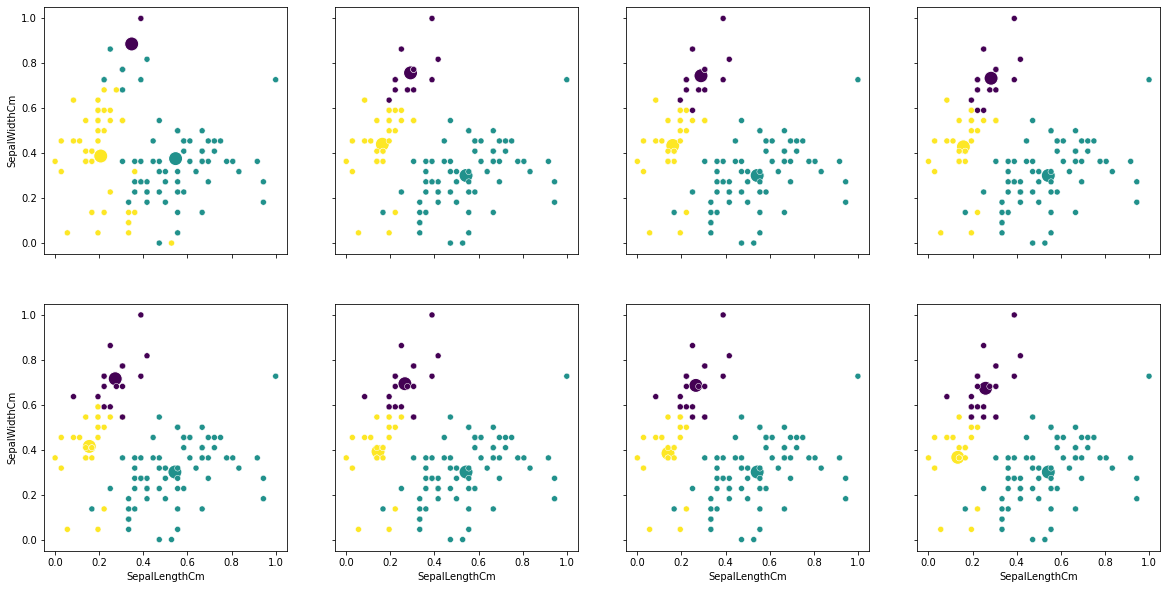

In [9]:
ncols = 4
nrows = int(len(history)/ ncols) if len(history) % ncols == 0 else int(np.ceil(len(history)/ ncols))

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, sharex=True, figsize=(ncols*5,nrows*5))
ax = ax.reshape(ncols * nrows)

for i, h in enumerate(history):
    sns.scatterplot(x=h[0][:, 0], y=h[0][:, 1], c=list(range(k)), marker="o", s=200, ax=ax[i])
    sns.scatterplot(x=train['SepalLengthCm'], y=train['SepalWidthCm'], c=h[1], ax=ax[i])

# KMeans Model

In [10]:
model = KMeans(k=3)
model.fit(train)

In [11]:
pred_labels = model.predict(test)

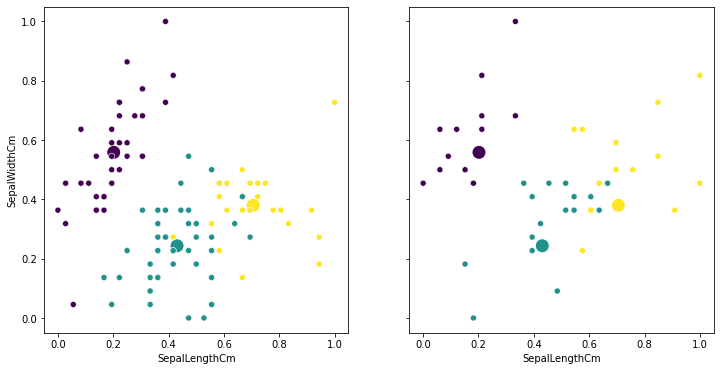

In [12]:
fig, ax = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(12,6))

sns.scatterplot(x=model.centroids[:, 0], y=model.centroids[:, 1], c=list(range(model.k)), marker="o", s=200, ax=ax[0])
sns.scatterplot(x=train['SepalLengthCm'], y=train['SepalWidthCm'], c=model.labels, ax=ax[0])

sns.scatterplot(x=model.centroids[:, 0], y=model.centroids[:, 1], marker="o", s=200, c=range(len(model.centroids)), ax=ax[1])
sns.scatterplot(x=test['SepalLengthCm'], y=test['SepalWidthCm'], c=pred_labels, ax=ax[1])

plt.show()